In [2]:
from dataAnalyse import CCV2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch_geometric.data import DataLoader 

In [3]:
testpath = "/vols/cms/mm1221/Data/100k/5e/test/"  
data_test = CCV2(testpath, max_events=99)
test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])


### Loading data


  0%|                                                                                             | 0/1 [00:18<?, ?it/s]

Reached 99!



/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


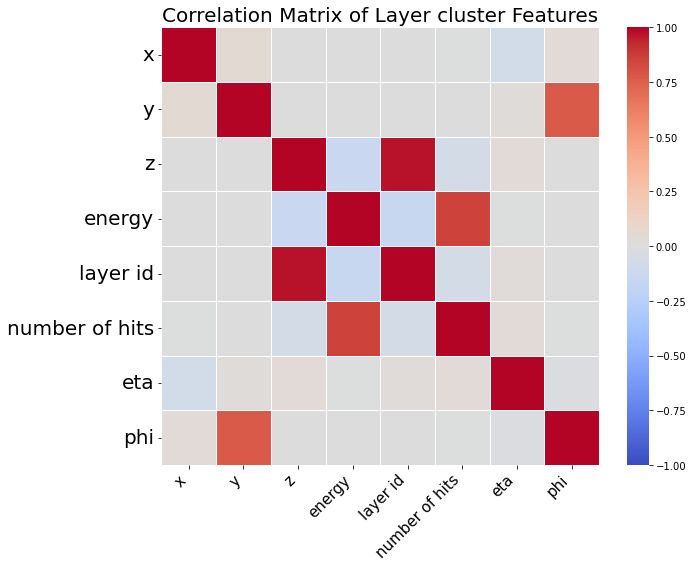

In [10]:
lc_x = np.array([])
lc_y = np.array([])
lc_z = np.array([])
lc_e = np.array([])
lc_id = np.array([])
lc_noh = np.array([])
lc_eta = np.array([])
lc_phi = np.array([])


for i, data in enumerate(test_loader):
    tmp_lc_x = data.x[:, 0].cpu().numpy()  # Convert tensor to NumPy
    tmp_lc_y = data.x[:, 1].cpu().numpy()
    tmp_lc_z = data.x[:, 2].cpu().numpy()
    tmp_lc_e = data.x[:, 3].cpu().numpy()
    tmp_lc_id = data.x[:, 4].cpu().numpy()
    tmp_lc_noh = data.x[:, 5].cpu().numpy()
    tmp_lc_eta = data.x[:, 6].cpu().numpy()
    tmp_lc_phi = data.x[:, 7].cpu().numpy()

    lc_x = np.append(lc_x, tmp_lc_x)
    lc_y = np.append(lc_y, tmp_lc_y)
    lc_z = np.append(lc_z, tmp_lc_z)
    lc_e = np.append(lc_e, tmp_lc_e)
    lc_id = np.append(lc_id, tmp_lc_id)
    lc_noh = np.append(lc_noh, tmp_lc_noh)
    lc_eta = np.append(lc_eta, tmp_lc_eta)
    lc_phi = np.append(lc_phi, tmp_lc_phi)
    
    if i == 500:
        break


data = pd.DataFrame({
    'x': lc_x,
    'y': lc_y,
    'z': lc_z,
    'energy': lc_e,
    'layer id': lc_id,
    'number of hits': lc_noh,
    'eta': lc_eta,
    'phi': lc_phi
})
    

    
# Compute the correlation matrix
corr_matrix = data.corr()

# Set up the plot
plt.figure(figsize=(10, 8))

# Custom heatmap
sns.heatmap(
    corr_matrix, 
    cmap="coolwarm",    # Color scheme (red-blue like the example)
    vmin=-1, vmax=1,    # Fix the range from -1 to 1
    center=0,           # Center at 0 for a balanced color scale
    annot=False,        # No text annotations
    linewidths=0.5,     # Thin grid lines
    square=True         # Keep square aspect ratio
)

# Customizing the appearance
plt.title("Correlation Matrix of Layer cluster Features", fontsize=20)
plt.xticks(rotation=45, ha="right", fontsize=15)
plt.yticks(fontsize=20)
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()
